<a href="https://colab.research.google.com/github/muski10/Deep-learning/blob/main/Assessment3(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CNN Model

In [24]:

# keras imports for the dataset and building our neural network
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
import numpy as np # linear algebra
import pandas as pd 
import keras
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# to calculate accuracy
from sklearn.metrics import accuracy_score



In [25]:
# loading the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

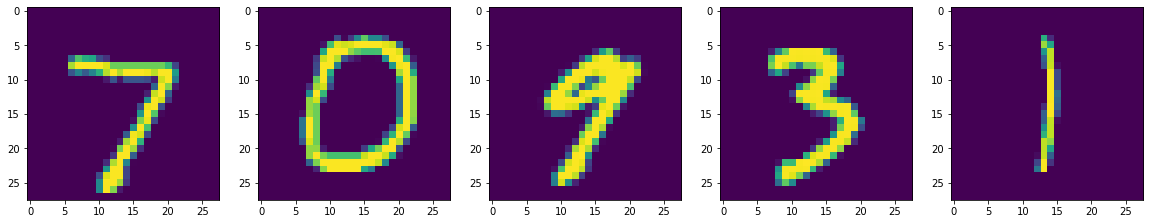

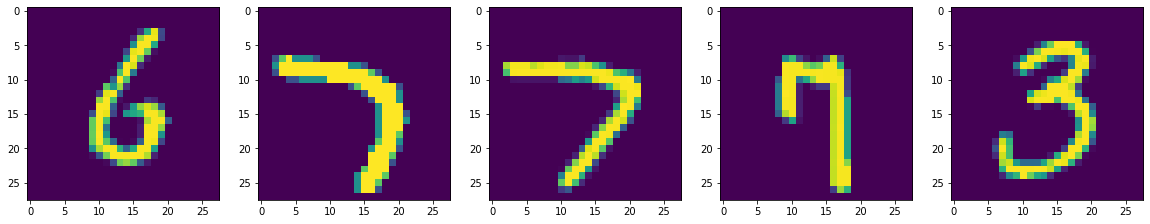

In [26]:
#Display sample input and output images (at least 10 images).
plt.figure(figsize=(20,5))
plt.subplot(151),plt.imshow(X_test[0])
plt.subplot(152),plt.imshow(X_test[10])
plt.subplot(153),plt.imshow(X_test[20])
plt.subplot(154),plt.imshow(X_test[30])
plt.subplot(155),plt.imshow(X_test[40])
plt.show()

plt.figure(figsize=(20,5))
plt.subplot(151),plt.imshow(X_test[50])
plt.subplot(152),plt.imshow(X_test[60])
plt.subplot(153),plt.imshow(X_test[70])
plt.subplot(154),plt.imshow(X_test[80])
plt.subplot(155),plt.imshow(X_test[90])
plt.show()

In [27]:
# building the input vector from the 28x28 pixels
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255


In [35]:
# building a linear stack of layers with the sequential model
model = Sequential()
# convolutional layer
model.add(Conv2D(filters=6, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(strides=2))
model.add(Conv2D(filters=16, kernel_size=(5,5), padding='valid', activation='relu'))
model.add(MaxPool2D(strides=2))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(12, activation='relu'))
model.add(Dense(84, activation='relu'))
# output layer
model.add(Dense(10, activation='softmax'))



In [36]:
model.build()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 12)                4812      
_________________________________________________________________
dense_10 (Dense)             (None, 84)               

In [30]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model for 10 epochs
model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))


Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0439 - accuracy: 0.9860 - val_loss: 0.0428 - val_accuracy: 0.9852
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0427 - accuracy: 0.9865 - val_loss: 0.0446 - val_accuracy: 0.9853
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0369 - accuracy: 0.9885 - val_loss: 0.0412 - val_accuracy: 0.9873
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0367 - accuracy: 0.9878 - val_loss: 0.0439 - val_accuracy: 0.9863
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0326 - accuracy: 0.9896 - val_loss: 0.0455 - val_accuracy: 0.9853
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0328 - accuracy: 0.9896 - val_loss: 0.0487 - val_accuracy: 0.9836
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0288 - accuracy: 0.9897 - val_loss: 0.0374 - val_accuracy: 0.9887
Epoch 